# Main stochastic processes

- Brownian motion
- Geometric Brownian motion
- Ornstein-Uhlebeck process
- CIR process
- Heston process

plot the distribution (for heston use Dragulescu) and check with Kolmogorov Smirnov test and **other tests**!!

Leggi Sauer, NIPE and stochastic simulation

In [ ]:
http://www.turingfinance.com/random-walks-down-wall-street-stochastic-processes-in-python/

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

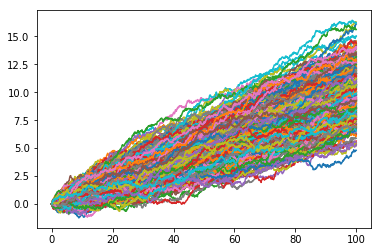

In [2]:
np.random.seed(seed=44)  #scipy.stats just uses numpy.random to generate its random numbers 

paths=500
steps=1000

mu = 0.1
sig = 0.2
T = 100
T_vec, dt = np.linspace(0, T, steps, retstep=True)

X0 = np.zeros((paths,1))
increments = ss.norm.rvs(loc=mu*dt, scale=np.sqrt(dt)*sig, size=(paths,steps-1))

X = np.concatenate((X0,increments), axis=1).cumsum(1)

plt.plot(T_vec,X.T)
plt.show()

0.09562864630765772
0.20036406920390673


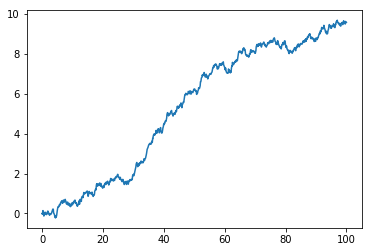

In [3]:
path0 = X[0,:]
ret = path0[1:]-path0[:-1]

print(ret.mean()/dt)
print(ret.std(ddof=0)/np.sqrt(dt))

plt.plot(T_vec,path0)
plt.show()

In [4]:
X_end = X[:,-1]
print(X_end.mean())
print(X_end.std(ddof=0))

10.035465998174347
2.0516129921431094


In [5]:
ss.t.interval(0.95, paths-1, loc=X_end.mean(), scale=ss.sem(X_end))

(9.855019727938718, 10.215912268409976)

In [6]:
s2 = X_end.var(ddof=0)

AA = s2 * (paths-1) 
print(np.sqrt(AA / ss.chi2.ppf(0.975, df=paths-1)), np.sqrt(AA / ss.chi2.ppf(0.025, df=paths-1)) )

1.9318469736371697 2.1873306145660245


In [7]:
np.random.seed(seed=44)

XT = ss.norm.rvs(loc=mu*T, scale=np.sqrt(T)*sig, size=paths)
print(XT.mean())
print(XT.std(ddof=0))

print(ss.t.interval(0.95, paths-1, loc=XT.mean(), scale=ss.sem(XT)))

s2 = XT.var(ddof=0)
AA = s2 * (paths-1) 
print(np.sqrt(AA / ss.chi2.ppf(0.975, df=paths-1)), np.sqrt(AA / ss.chi2.ppf(0.025, df=paths-1)) )

10.077140390262059
2.005201382258947
(9.90077617737901, 10.253504603145108)
1.8881447118364731 2.1378487992530504


In [9]:
x = np.linspace(XT.min(), XT.max(), 100)

param = ss.norm.fit(XT) # gives the location as an input
pdf_fitted = ss.norm.pdf(x, *param)
print(param) # these are MLE parameters

(10.013675989177294, 1.9605430059932538)


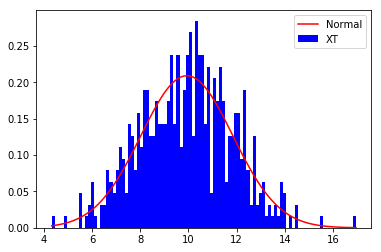

In [19]:
plt.plot(x, pdf_fitted, color='r', label="Normal")
plt.hist(XT, density=True, bins=100, facecolor="Blue", label="XT")
plt.legend()
plt.show()

histograms and fit distributions and KS test

In [20]:
ss.ks_2samp(XT, X_end)

Ks_2sampResult(statistic=0.050000000000000044, pvalue=0.5491661614735049)

In [32]:
ss.kstest(XT,lambda x: ss.norm.cdf(x,loc=10, scale=2))

KstestResult(statistic=0.031560343414417935, pvalue=0.7017086167962918)

In [33]:
ss.kstest(X_end,lambda x: ss.norm.cdf(x,loc=10, scale=2))

KstestResult(statistic=0.03129723291189973, pvalue=0.7115225040333455)

In [57]:
ss.kstest(ret, lambda x: ss.norm.cdf(x,loc=0.1*dt, scale=0.2*np.sqrt(dt)))

KstestResult(statistic=0.017634233748839295, pvalue=0.9152297775237352)

In [53]:
ss.shapiro(X_end)

(0.9966358542442322, 0.38309791684150696)

In [55]:
ss.jarque_bera(X_end)  # good results for N > 2000

0.34183629275090377

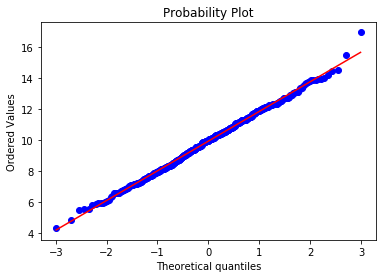

In [60]:
# Probability plot (Q-Q plot is another thing. It is sample vs sample)
ss.probplot(XT, plot=plt)    # it works for any distribution
plt.show()